In [2]:
# Trova l'anno con più rilasci di videogiochi

import pandas as pd

# Load the CSV file with the correct delimiter
file_path = 'vgnames.csv'
vgnames_df = pd.read_csv(file_path, delimiter=';')

# Rename the columns to be more descriptive
vgnames_df.columns = ['id_games', 'Name', 'Platform', 'Year', 'Genre', 'Publisher']

# Convert the Year column to integer type for easier processing
vgnames_df['Year'] = pd.to_numeric(vgnames_df['Year'], errors='coerce').astype('Int64')

# Find the year with the most games published
most_games_year = vgnames_df['Year'].value_counts().idxmax()
most_games_year_count = vgnames_df['Year'].value_counts().max()

most_games_year, most_games_year_count

(2007, 71)

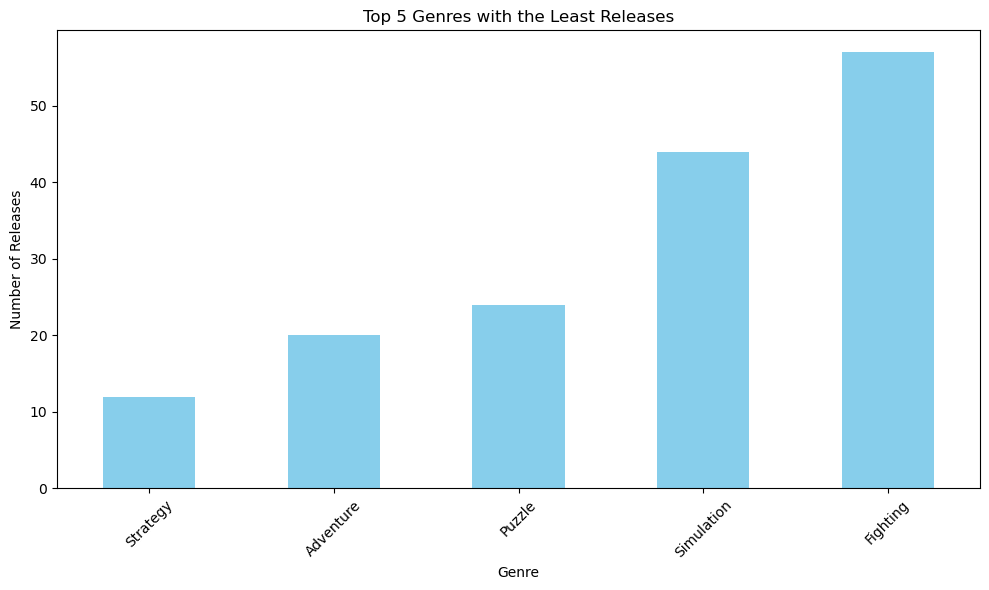

In [4]:
# Trova i 5 generi con meno rilasci

import matplotlib.pyplot as plt

# Find the top 5 genres with the least releases
least_released_genres = vgnames_df['Genre'].value_counts().nsmallest(5)

# Create a bar plot for the top 5 genres with the least releases
plt.figure(figsize=(10, 6))
least_released_genres.plot(kind='bar', color='skyblue')
plt.title('Top 5 Genres with the Least Releases')
plt.xlabel('Genre')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

   Rank                      Name Platform    Year         Genre Publisher
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo
   Rank  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0     1     41.49     29.02      3.77         8.46         82.74
1     2     29.08      3.58      6.81         0.77         40.24
2     3     15.85     12.88      3.79         3.31         35.82
3     4     15.75     11.01      3.28         2.96         33.00
4     5     11.27      8.89     10.22         1.00         31.37
  Aggiungi altre dieci case editrici.  Year Founded              Headquarters  \
0                            Nintendo          1889              Kyoto, Japan  

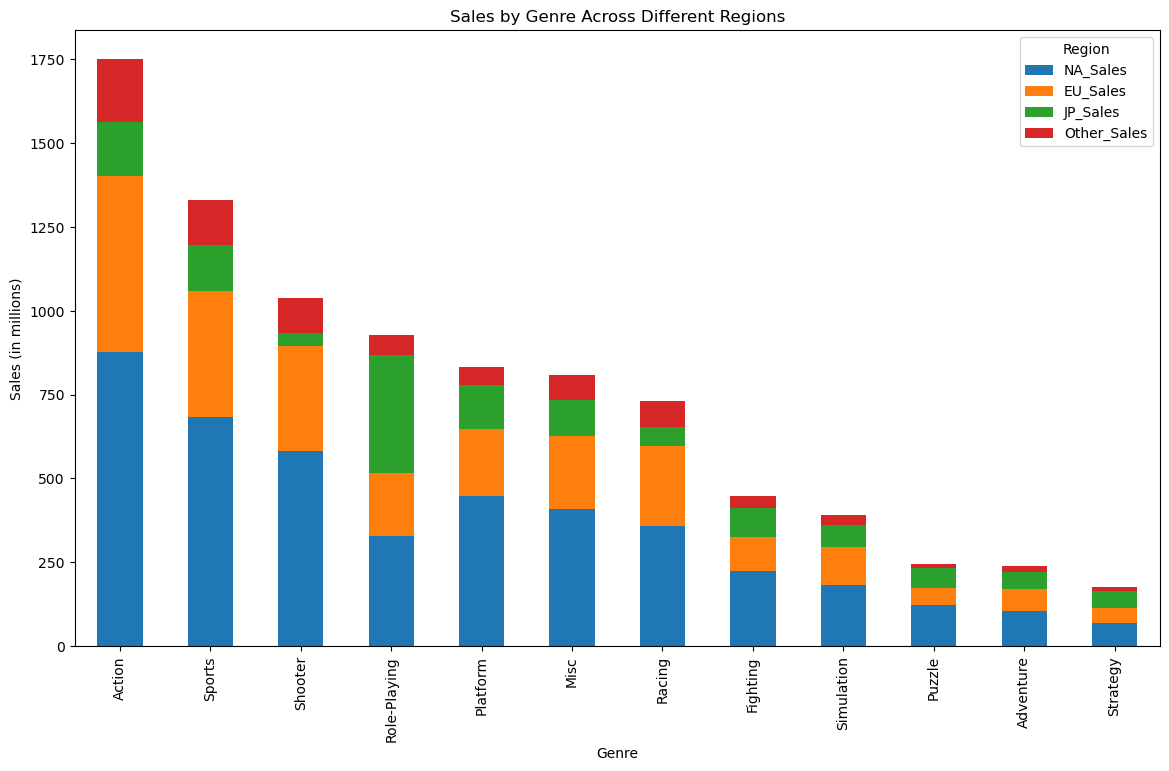

              NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre                                                                
Action          877.71    524.97    159.89       187.33       1750.91
Sports          683.35    376.85    135.37       134.97       1330.93
Shooter         582.60    313.27     38.28       102.69       1037.37
Role-Playing    327.28    188.06    352.31        59.61        927.37
Platform        447.05    201.63    130.77        51.59        831.37
Misc            410.24    215.98    107.76        75.32        809.96
Racing          359.42    238.39     56.69        77.27        732.04
Fighting        223.59    101.32     87.35        36.68        448.91
Simulation      183.31    113.38     63.70        31.52        392.20
Puzzle          123.78     50.78     57.31        12.55        244.95
Adventure       105.72     64.00     51.12        16.75        237.82
Strategy         68.70     45.34     49.46        11.36        175.12


In [8]:
# Vedere rendimento genere videoludico per regione

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
file_path = 'vgcomplete.xlsx'
data = pd.read_excel(file_path, sheet_name=None)

# Extract individual sheets into dataframes
vgnames = data['vgnames']
vgsales = data['vgsales']
publisher_details = data['publisher_details']

# Display the first few rows of each dataframe to understand their structure
print(vgnames.head())
print(vgsales.head())
print(publisher_details.head())

# Merge vgnames and vgsales on the 'Rank' column
merged_data = pd.merge(vgnames, vgsales, on='Rank')

# Aggregate sales by genre and region
genre_sales = merged_data.groupby('Genre').sum(numeric_only=True)

# Select only the sales columns for analysis
genre_sales = genre_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

# Sort by global sales for visualization
genre_sales_sorted = genre_sales.sort_values(by='Global_Sales', ascending=False)

# Plot the sales by genre across different regions
plt.figure(figsize=(14, 8))
genre_sales_sorted[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Sales by Genre Across Different Regions')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.legend(title='Region')
plt.show()

# Display the resulting dataframe
print(genre_sales_sorted)